# Flight Price Prediction Project

This project focuses on understanding and predicting flight ticket prices using a real-world dataset. The goal is to extract actionable insights and build a basic predictive model that helps identify the key factors influencing airfare pricing.

---

## Objective:
To analyze flight data and uncover trends, patterns, and key variables that drive ticket prices. The project also includes building a simple prediction model to support price estimation.

---

## Key Steps:
- **Data Cleaning:** Handled missing values and formatted columns like "Date_of_Journey", "Arrival_Time", and "Dep_Time".
- **Feature Engineering:** Extracted day, month, hour, and minute components for better time-based analysis.
- **Encoding Categorical Data:** Applied Label Encoding to features like "Airline", "Source", "Destination", and "Additional_Info".
- **Exploratory Data Analysis (EDA):** Visualized relationships between ticket price and features such as total stops, airline, and flight duration.
- **Predictive Modeling:** Used Random Forest Regressor to estimate flight prices. Achieved an R² score of 0.86, indicating strong model performance.
- **Business Insight:** Identified key drivers of price — Duration, Airline, and Date of Journey — using feature importance analysis.

---

## Tools & Libraries:
- Python (Pandas, NumPy, Seaborn, Matplotlib)
- Scikit-learn (train-test split, LabelEncoder, RandomForestRegressor, r² score)

---

## Business Value:
This project offers data-driven insights into how different factors influence airfare. The model can assist travel agencies and customers in understanding flight pricing trends and making informed booking decisions.

---


In [44]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [46]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [47]:
train_df.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → 

In [48]:
test_df = pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [49]:
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [50]:
test_df.info

<bound method DataFrame.info of                 Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20     

In [51]:
### Merging train and test datasets
final_df = pd.concat([train_df, test_df], axis=0)
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [52]:
final_df.info

<bound method DataFrame.info of                 Airline Date_of_Journey    Source Destination  \
0                IndiGo      24/03/2019  Banglore   New Delhi   
1             Air India       1/05/2019   Kolkata    Banglore   
2           Jet Airways       9/06/2019     Delhi      Cochin   
3                IndiGo      12/05/2019   Kolkata    Banglore   
4                IndiGo      01/03/2019  Banglore   New Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                      Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                 BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1     CCU → IXR → BBI → BLR    05:50 

In [53]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [54]:
train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [55]:
test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


#### Flight Price Distribution

This histogram shows the distribution of flight ticket prices across the dataset. It helps to understand the price range and skewness. We observe that most flights are priced within the lower to mid-range, with a few outliers at higher prices.


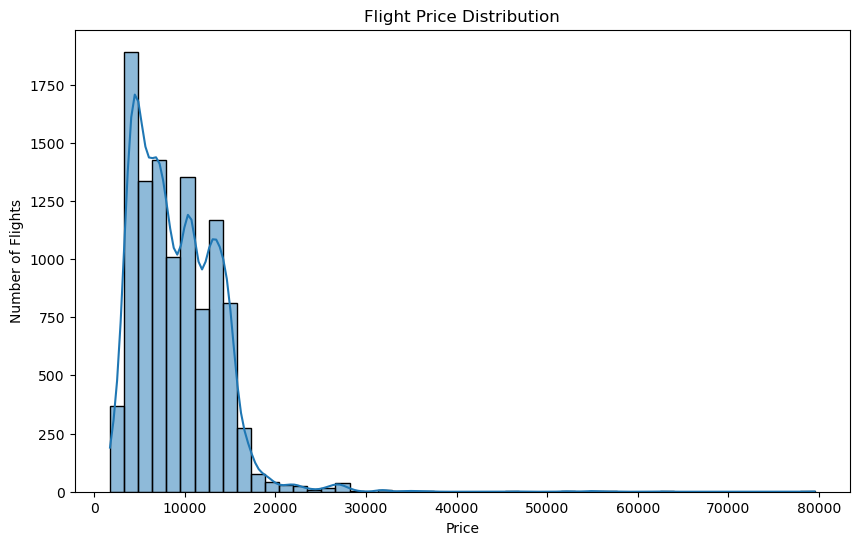

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(final_df['Price'], bins=50, kde=True)
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Flights')
plt.show()

#### Number of Flights per Airline

This bar chart displays the number of flights recorded for each airline. It highlights the airlines with the most frequent flights, which can influence price prediction due to volume and competition.


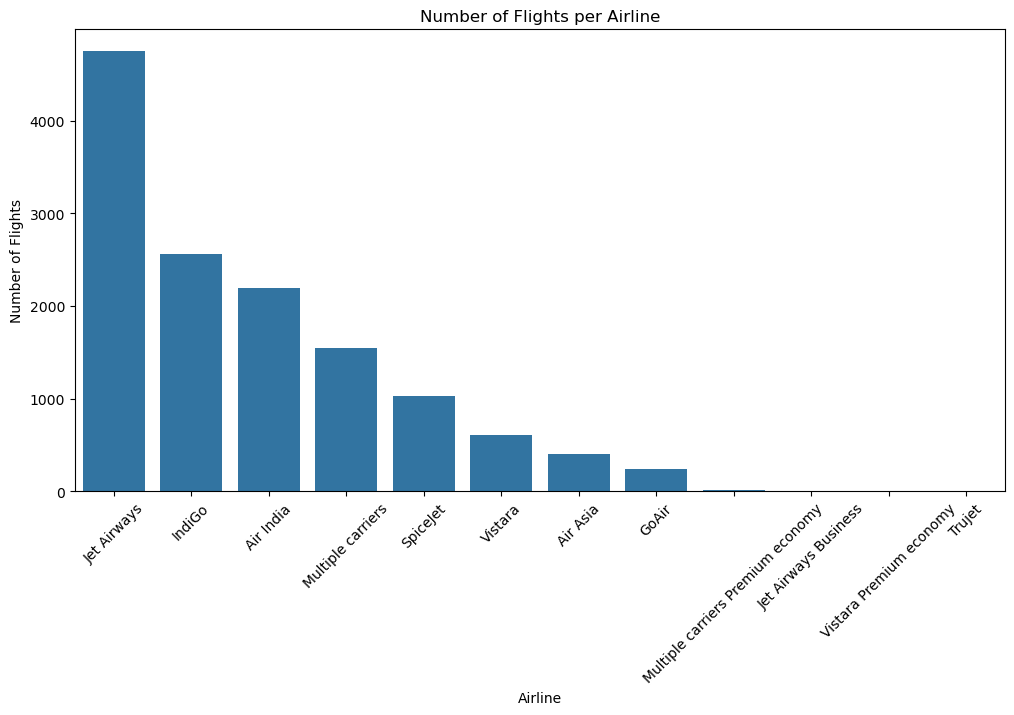

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(data=final_df, x='Airline', order=final_df['Airline'].value_counts().index)
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()


#### Flights by Source and Destination Cities

These charts provide insight into the busiest departure and arrival cities in the dataset, which may impact price due to demand and route popularity.


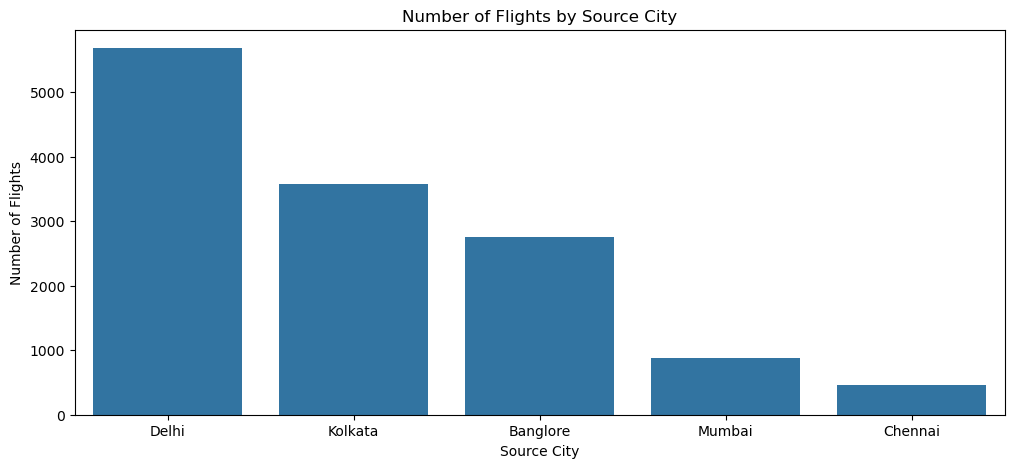

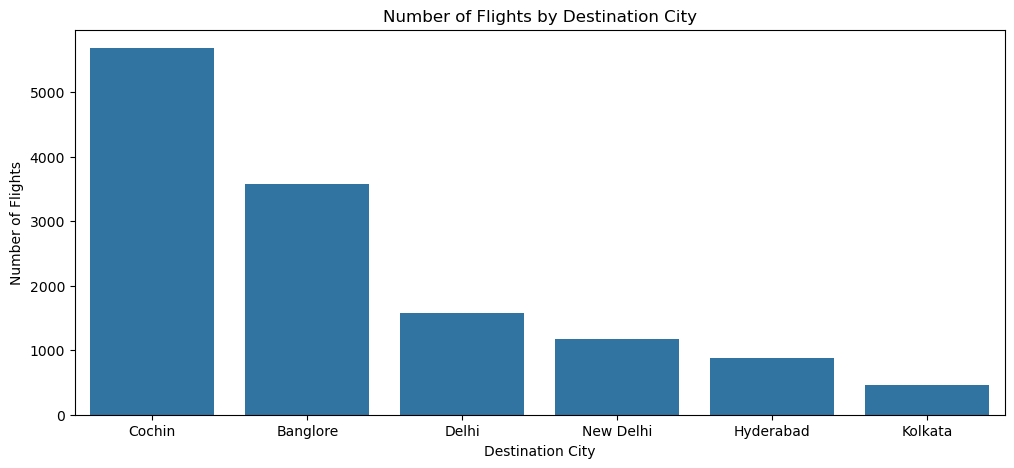

In [61]:
plt.figure(figsize=(12,5))
sns.countplot(data=final_df, x='Source', order=final_df['Source'].value_counts().index)
plt.title('Number of Flights by Source City')
plt.xlabel('Source City')
plt.ylabel('Number of Flights')
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(data=final_df, x='Destination', order=final_df['Destination'].value_counts().index)
plt.title('Number of Flights by Destination City')
plt.xlabel('Destination City')
plt.ylabel('Number of Flights')
plt.show()


In [62]:
# Feature Engineering - Extracting Date Components
# Extracting Day, Month, and Year from 'Date_of_Journey'

final_df['Date'] = final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month'] = final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year'] = final_df['Date_of_Journey'].str.split('/').str[2]
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.5+ MB


In [64]:
# Converting Date Components to Numeric Type
# Converting extracted date, month, and year from string to integer

final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)

### Insight: Price Variation Across Months

The boxplot reveals how flight prices vary by month. This helps identify seasonal trends, such as spikes during peak travel seasons (e.g., summer holidays or festivals). Noticing such patterns allows businesses to plan promotions or allocate resources accordingly.


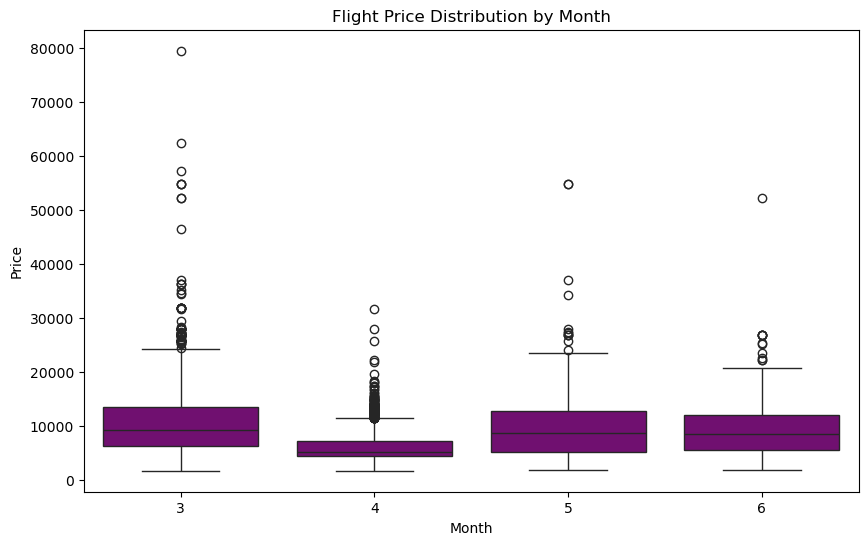

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(data=final_df, x='Month', y='Price', color='purple')
plt.title('Flight Price Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()


In [67]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [68]:
# Dropping Redundant Column
# 'Date_of_Journey' is no longer needed as we have extracted useful components

final_df.drop('Date_of_Journey', axis=1, inplace=True)

In [69]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [70]:
# Simplifying Arrival Time Format
# Removing the date part from 'Arrival_Time' and keeping only the time (HH:MM)

final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(' ').str[0]

In [71]:
# Extracting Hour and Minute from Arrival Time
# Splitting 'Arrival_Time' into 'Arrival_hour' and 'Arrival_minutes'
final_df['Arrival_hour'] = final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_minutes'] = final_df['Arrival_Time'].apply(lambda x:x.split(':')[1])

# Converting to integer type for numerical analysis
final_df['Arrival_hour'] = final_df['Arrival_hour'].astype(int)
final_df['Arrival_minutes'] = final_df['Arrival_minutes'].astype(int)

### Insight: Price vs Arrival Time

This plot helps identify whether prices vary based on the hour of arrival. Certain hours may align with high-demand times (e.g., early morning or evening), potentially influencing price.


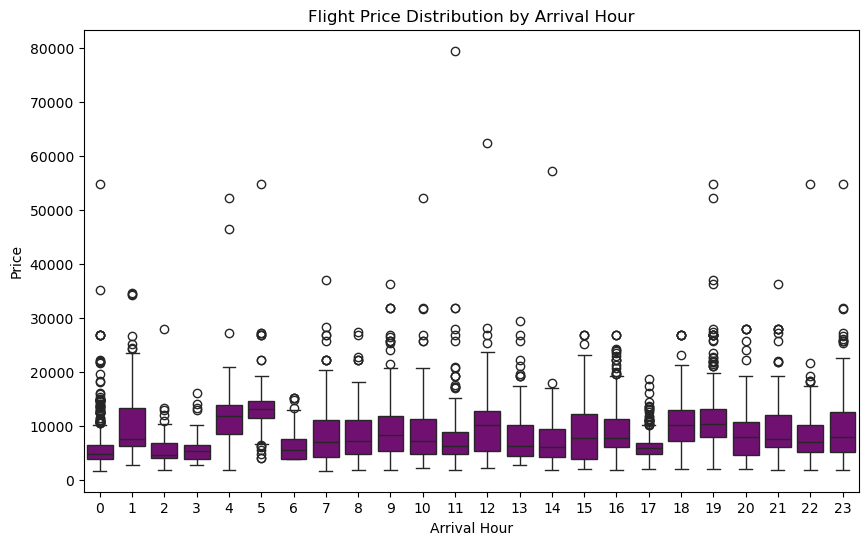

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(data=final_df, x='Arrival_hour', y='Price', color='purple')
plt.title('Flight Price Distribution by Arrival Hour')
plt.xlabel('Arrival Hour')
plt.ylabel('Price')
plt.show()


In [74]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [75]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_hour     13354 non-null  int32  
 14  Arrival_minutes  13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [76]:
# Dropping Original Arrival_Time Column
# After extracting hour and minute components, the original column is no longer needed

final_df.drop('Arrival_Time',axis=1,inplace=True)
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [77]:
# Extracting Hour and Minute from Departure Time
# Splitting 'Dep_Time' into 'Dep_hour' and 'Dep_min'
final_df['Dep_hour'] = final_df['Dep_Time'].str.split(':').str[0]
final_df['Dep_min'] = final_df['Dep_Time'].apply(lambda x:x.split(':')[1])

# Converting to integer type
final_df['Dep_hour'] = final_df['Dep_hour'].astype(int)
final_df['Dep_min'] = final_df['Dep_min'].astype(int)

# Dropping the original column to avoid redundancy
final_df.drop('Dep_Time', axis=1, inplace=True)

### Insight: Price vs Departure Time

Analyzing the boxplot of price by departure hour helps identify whether certain time slots are priced higher — such as peak business hours or red-eye flights. These insights are valuable for both consumers and airlines.


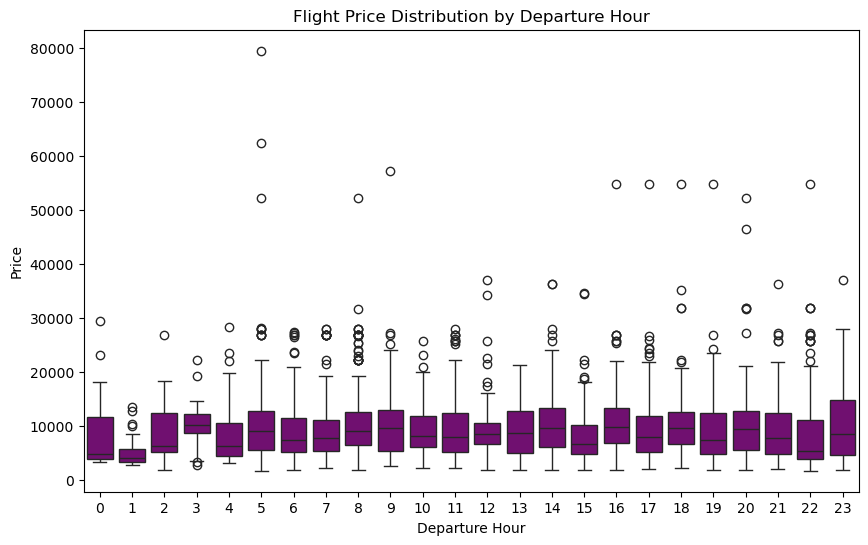

In [79]:
plt.figure(figsize=(10,6))
sns.boxplot(data=final_df, x='Dep_hour', y='Price', color='purple')
plt.title('Flight Price Distribution by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Price')
plt.show()


In [80]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_hour     13354 non-null  int32  
 12  Arrival_minutes  13354 non-null  int32  
 13  Dep_hour         13354 non-null  int32  
 14  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [81]:
# Checking for Missing Values
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_minutes       0
Dep_hour              0
Dep_min               0
dtype: int64

In [82]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [83]:
# Encoding Total Stops and Handling Missing Values

# Mapping stop categories to numeric values
final_df['Total_Stops'] = final_df['Total_Stops'].map({'non-stop':0, '2 stops':2, '3 stops':3, '1 stop':1, '4 stops':4})

# Filling missing values with 1 stop (assumed default or common case)
final_df['Total_Stops'].fillna(1,inplace=True)

C:\Users\shant\AppData\Local\Temp\ipykernel_5716\154554161.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['Total_Stops'].fillna(1,inplace=True)


### Insight: Price vs Total Stops

This plot clearly shows how increasing the number of stops affects the ticket price. Non-stop flights tend to be more expensive, while flights with more stops are generally cheaper — a trade-off between cost and travel convenience.


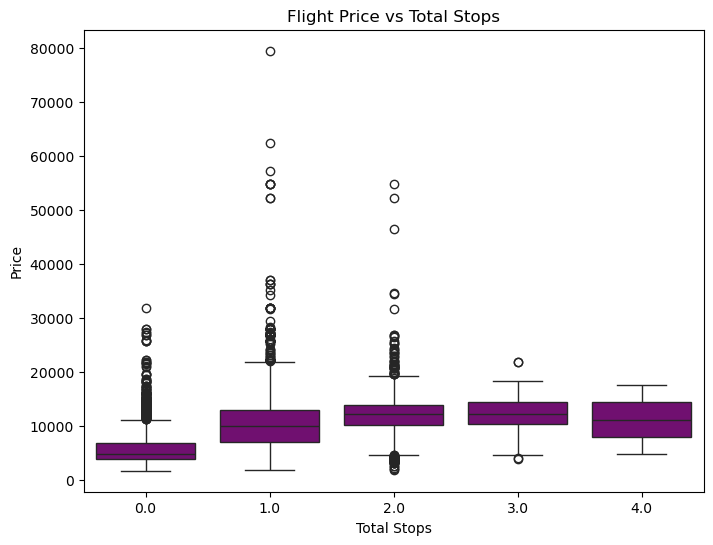

In [85]:
plt.figure(figsize=(8,6))
sns.boxplot(data=final_df, x='Total_Stops', y='Price', color='purple')
plt.title('Flight Price vs Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()


In [86]:
# Dropping Unused Categorical Column: 'Route'
# The 'Route' column is redundant after extracting relevant stop information

final_df.drop('Route', axis=1, inplace=True)

In [87]:
final_df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50


In [88]:
# Feature Engineering: Duration to Total Minutes
# Split 'Duration' into hours and minutes
Duration_hrs = final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]
Duration_mins = final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

# Filling missing minute/hour values with 0
Duration_mins.fillna(0, inplace=True)
Duration_hrs.fillna(0, inplace=True)
Duration_mins

# Cleaning any stray 'h' or 'm' if still present
Duration_hrs = Duration_hrs.str.replace('h','',regex=False).str.replace('m','',regex=False)
# Converting to integers
Duration_hrs = Duration_hrs.astype(int)
print(Duration_hrs.dtype)

# Cleaning any stray 'h' or 'm' if still present
Duration_mins = Duration_mins.str.replace('h','',regex=False).str.replace('m','',regex=False)
Duration_mins.fillna(0, inplace=True)
# Converting to integers
Duration_mins = Duration_mins.astype(int)
print(Duration_mins.dtype)

int32
int32


In [89]:
# Calculating total duration in minutes
Total_duration_mins = Duration_hrs*60 + Duration_mins
Total_duration_mins

0        170
1        445
2       1140
3        325
4        285
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 13354, dtype: int32

In [90]:
# Replacing original Duration column with numeric duration
final_df['Duration'] = Total_duration_mins
final_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,445,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882.0,9,6,2019,4,25,9,25


### Insight: Price vs Duration

This scatter plot highlights the relationship between flight duration and price. Longer flights often cost more, but not always — multi-stop or overnight flights might have long durations but lower prices, adding nuance to price predictions.


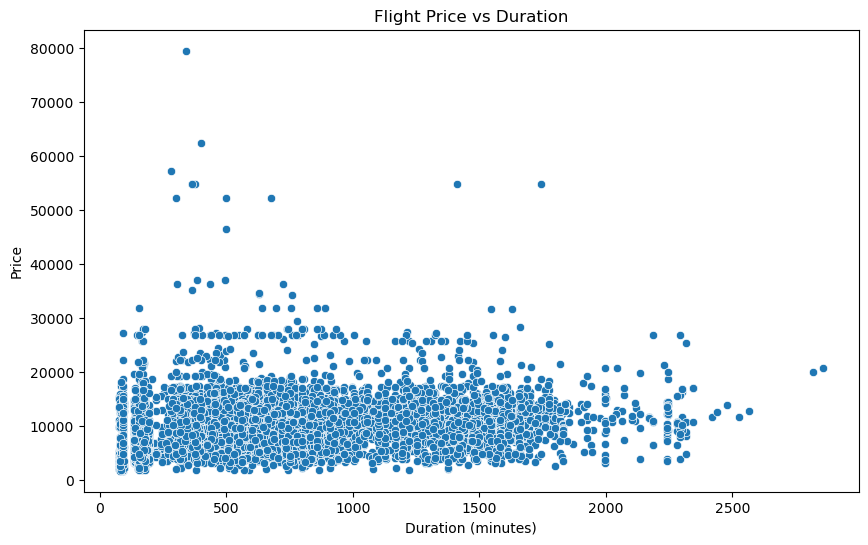

In [92]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=final_df, x='Duration', y='Price')
plt.title('Flight Price vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.show()


In [93]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  int32  
 4   Total_Stops      13354 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_hour     13354 non-null  int32  
 11  Arrival_minutes  13354 non-null  int32  
 12  Dep_hour         13354 non-null  int32  
 13  Dep_min          13354 non-null  int32  
dtypes: float64(2), int32(8), object(4)
memory usage: 1.1+ MB


In [94]:
### Now handling categorical features

In [95]:
# Airline feature
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [96]:
# Label Encoding Categorical features
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [97]:
# Encoding 'Airline' column (categorical → numeric)
final_df['Airline'] = labelencoder.fit_transform(final_df['Airline'])

### Insight: Price Variation by Airline

Different airlines have distinct pricing patterns. Some low-cost carriers have consistently lower prices, while full-service airlines charge more. Even with encoded labels, we can uncover pricing trends by airline.


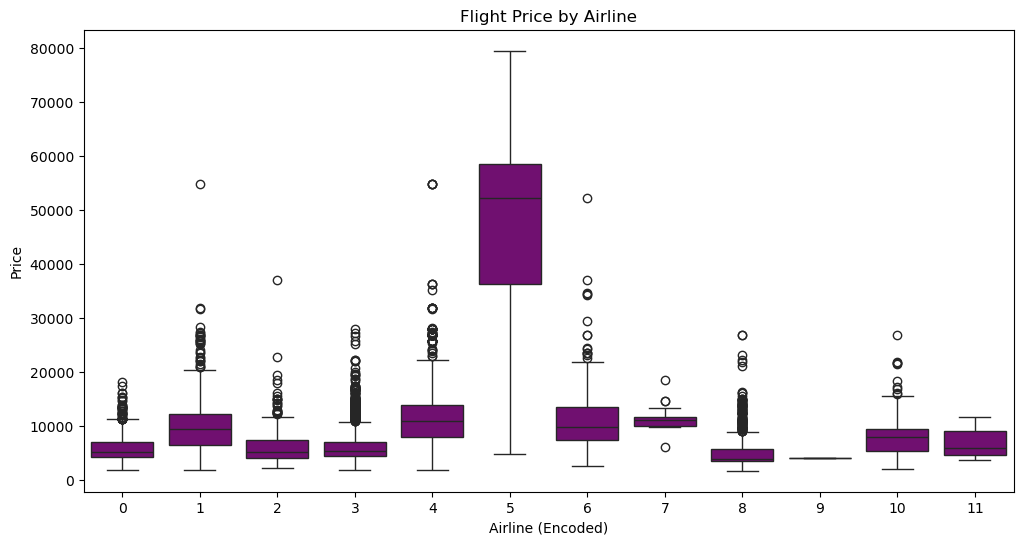

In [99]:
plt.figure(figsize=(12,6))
sns.boxplot(data=final_df, x='Airline', y='Price', color='purple')
plt.title('Flight Price by Airline')
plt.xlabel('Airline (Encoded)')
plt.ylabel('Price')
plt.show()


In [100]:
final_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [101]:
final_df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [102]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [103]:
# Encoding 'Source', 'Destination', 'Additional_Info' column (categorical → numeric)

final_df['Source'] = labelencoder.fit_transform(final_df['Source'])
final_df['Destination'] = labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info'] = labelencoder.fit_transform(final_df['Additional_Info'])

### Insight: Price Variation by Source

The departure city (Source) has a notable impact on flight prices due to factors like demand, airport fees, and distance. This plot helps visualize how prices differ based on the source location.


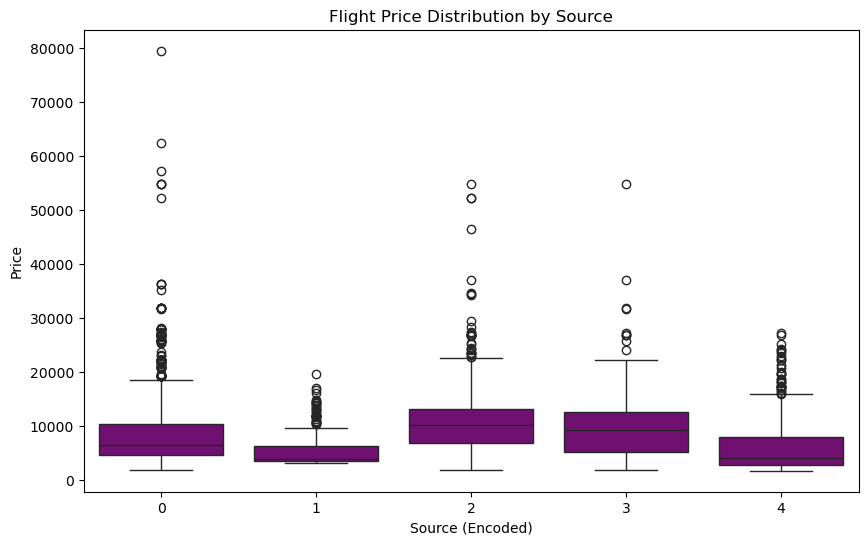

In [105]:
plt.figure(figsize=(10,6))
sns.boxplot(data=final_df, x='Source', y='Price', color='purple')
plt.title('Flight Price Distribution by Source')
plt.xlabel('Source (Encoded)')
plt.ylabel('Price')
plt.show()


> **Note:** Other categorical variables such as **"Additional_Info"** and **"Destination"** were also explored during the analysis. However, they showed minimal or less significant impact on flight prices compared to **"Airline"** and **"Source"**. To maintain clarity and focus, these variables are not visualized in the current set of plots.




In [107]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minutes,Dep_hour,Dep_min
0,3,0,5,170,0.0,8,3897.0,24,3,2019,1,10,22,20
1,1,3,0,445,2.0,8,7662.0,1,5,2019,13,15,5,50
2,4,2,1,1140,2.0,8,13882.0,9,6,2019,4,25,9,25
3,3,3,0,325,1.0,8,6218.0,12,5,2019,23,30,18,5
4,3,0,5,285,1.0,8,13302.0,1,3,2019,21,35,16,50


## Modeling Flight Prices to Extract Business Insights (Random Forest)

In this section, we use a Random Forest Regressor to model and predict flight ticket prices based on factors like airline, number of stops, journey duration, and timing. This helps us understand which features most influence pricing, supporting smarter business decisions and customer strategies.


In [109]:
# Drop rows where target 'Price' is NaN
final_df = final_df.dropna(subset=['Price'])

In [110]:
# Step 1: Define features and target
X = final_df.drop('Price', axis=1)
y = final_df['Price']

In [111]:
# Step 2: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Step 3: Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [113]:
# Step 4: Evaluate Performance
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8601231145241811


### Model Performance Summary

We used a Random Forest Regressor to predict flight prices based on key features like airline, duration, stops, and departure/arrival time.

The model achieved an **R² score of 0.85**, indicating strong predictive performance.

This means it can explain approximately 85% of the variation in ticket prices, helping businesses understand what drives fare differences.


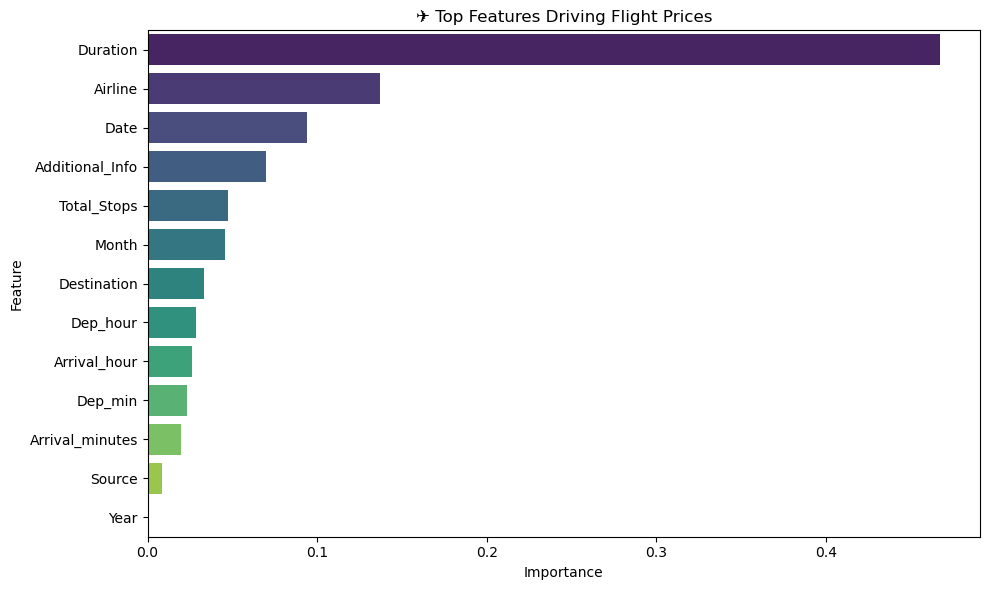

In [115]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for better plotting
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, hue='Feature', dodge=False, palette='viridis', legend=False)
plt.title('✈️ Top Features Driving Flight Prices')
plt.tight_layout()
plt.show()


### Business Insight from Modeling  
We used a Random Forest Regressor to estimate which factors influence flight prices. The model achieved an **R² score of 0.86**, indicating strong predictive capability.

Key drivers of price variation:

- **Duration** of the flight  
- **Airline** choice  
- **Date** of travel  
- **Additional_Info** (e.g. meal services, baggage info)  

These insights can help travel agencies, aggregators, and customers understand what factors most impact ticket pricing and make informed decisions.
